In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pysal
from pysal.weights.util import get_points_array_from_shapefile

# São Paulo Census data analysis

In [ ]:
# Build Census track dataframe reading csv file exported from shapefile
datac = "~/Git/Resolution/SC2010_CEM_RMSP_Income_Race.csv"
dfc = pd.read_csv(datac)
dfc.head()

## Income classes in function of frequency sum

In [ ]:
# slice income columns and sum each column
income = dfc.loc[:,'DR_005':'DR_014']
income.sum()

In [ ]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(12, 8), dpi=300)
plt.xlabel('Income')
plt.ylabel('Frequency sum')
plt.title('Income intervals')

income.sum().plot(kind='bar')

#### Income variables reference

<prep>
```
|DR_005|Up to 1/8 minimum wage
|DR_006|1/8 to 1/4 minimum wage
|DR_007|1/4 to 1/2 minimum wage
|DR_008|1/2 to 1 minimum wage
|DR_009|1 to 2 minimum wages
|DR_010|2 to 3 minimum wages
|DR_011|3 to 5 minimum wages
|DR_012|5 to 10 minimum wages
|DR_013|More than 10 minimum wages
|DR_014|No income
```
<prep>

Groups to be defined.
Probably: up to ¼ m.w.; ¼ to ½; ½ to 1; 1 to 3, 3 to 5, more than 5.

## Color or Race in function of frequency sum

In [ ]:
# slice race and color columns and sum
race = dfc.loc[:,'P3_001':'P3_006']
race.sum()

In [ ]:
# plot Race and color 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(10, 6), dpi=300)
plt.xlabel('Race and Color')
plt.ylabel('Frequency sum')
plt.title('Race and Color intervals')

race.sum().plot(kind='bar')

#### Race and Color variables reference

<prep>
```
|P3_001| Residents - Pessoas Residentes
|P3_002| White - Brancos
|P3_003| Black - Pretos
|P3_004| Asian - Amarelos
|P3_005| “Pardos” - Pardos
|P3_006| Indígenas - Indígenas
```
<prep>

*Black and “Pardos” will be merged in the same group.

# Weighting Areas data

In [ ]:
# Build weighting area dataframe reading csv file exported from shapefile
dataw = "~/Git/Resolution/AP2010_CEM_RMSP_EGP_EDU.csv"
dfw = pd.read_csv(dataw)
dfw.head()

## Education in function of frequency sum

In [ ]:
# slice education columns and sum each column
education = dfw.loc[:,'EDU1':'EDU5']
education.sum()

In [ ]:
# plot education
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(10, 6), dpi=300)
plt.xlabel('Education')
plt.ylabel('Frequency sum')
plt.title('Education intervals')

education.sum().plot(kind='bar')

#### Eduacation variables reference

<prep>
```
|EDU1| No education and incomplete elementary school - Sem instrução ou fundamental incompleto
|EDU2| Complete elementary school and incomplete high school - Fundamental completo e médio incompleto
|EDU3| Complete high school and incomplete college - Médio completo e superior incompleto
|EDU4| Complete College/University - Superior Completo
|EDU5| Not determined - Não determinado 
```
<prep>

## Ocupation in function of frequency sum

In [ ]:
# slice ocupation columns and sum each column
ocupation = dfw.loc[:,'EGP1':'EGP11_']
ocupation.sum()

In [ ]:
# plot ocupation
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(12, 8), dpi=300)
plt.xlabel('Ocupation')
plt.ylabel('Frequency sum')
plt.title('Ocupation intervals')

ocupation.sum().plot(kind='bar')

#### Eduacation variables reference

<prep>
```
|EGP1| I. Higher professionals
|EGP2| II. Lower professionals
|EGP3| IIIa. Routine non-manuals, higher degree
|EGP4| IIIb. Routine non-manual, lower degree
|EGP5| IVa2. Proprietors and employers 
|EGP6| IVc1. Rural employers
|EGP7| IVc2. Self-employed farmers and subsistence agriculture workers
|EGP8| V. Technicians and Supervisors of manual workers
|EGP9| VI. Skilled workers
|EGP10| VIIa. Semi- and unskilled workers
|EGP11| VIIb. Agricultural workers
```
<prep>

[SS] Classes EGP6, EGP7 and EGP11 could be grouped in Agricultural workers

# Ocupation groups Microdata

## Histograms

In [6]:
# Build Census Ocupation dataframe reading csv file
dataoccup = "~/Dropbox/Resolution - SP London/Data/Census/Original Data/Sao Paulo/occupation_micro_rmsp_2010.csv"
dfoccup = pd.read_csv(dataoccup, na_filter=True, dtype={'V6461':np.str})
dfoccup.head()

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,38,39,40,41,42,43,44,103,120,123,124,128,130,131,133,134,135,136,137,141,142,143,144,145,148,149,150,151,152,153,181,182,183,184,185) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


mesoreg  microreg   muniat  V0300  RM          AREAP  V1006    PESODOM  \
0     3515     35061  3548708      2  20  3548708005019      1  17.624277   
1     3515     35059  3518800      8  20  3518800005020      1  20.064749   
2     3515     35059  3518800      8  20  3518800005020      1  20.064749   
3     3515     35060  3515004     37  20  3515004005003      1  10.589189   
4     3515     35061  3550308     47  20  3550308005251      1  24.822914   

   V4001  V4002  ...  M0668 M6681 M6682 M0669 M6691 M6692 M6693 M0670 M0671  \
0      1     13  ...      0     0     0     0     0     0     0     0     0   
1      1     11  ...      0     0     0     0     0     0     0     0     0   
2      1     11  ...      0     0     0     0     0     0     0     0     0   
3      1     11  ...      0     0     0     0     0     0     0     0     0   
4      1     11  ...      0     0     0     0     0     0     0     0     0   

  M6800  
0     0  
1     0  
2     0  
3     0  
4     0  

[5 rows x 282 columns]

In [7]:
# delete militar occupations from lines
# '0':51086, '110':23, '210':112, '299':122, '411':76, '412':113, '511':21, '512':9, '599':486,'999':219 = 1181 rows

codes = ['110', '210', '299', '411', '412', '511', '512', '599', '999']
for i in codes:
    dfoccup = dfoccup.drop(dfoccup[dfoccup.V6461 == i].index)

In [8]:
dfocc = dfoccup.loc[:,("AREAP", "PESO", "V6461")]
dfocc["V6461"] = dfocc["V6461"].map(lambda x: str(x)[0:3])
dfocc.tail()
# dfocc[dfocc.AREAP == 3518800005020]
# dftt["valid"] = dftt["PESO"] != dftt["PESODOM"]  #for validation only
# dfocc[dfocc.AREAP == 3503901003001]
# dfocc[(dfocc.AREAP == 3503901003001) & (dfocc.V6461 =='133')]

AREAP       PESO V6461
1216606  3550308005247  20.452609   962
1216607  3550308005153  22.266962   962
1216608  3505708005011  10.392491   962
1216609  3550308005225  17.983891   962
1216610  3550308005231  31.898793   962

In [9]:
# dfocc.groupby(["AREAP", "V6461"])["PESO"].sum()

print("Valid area: ", dfoccup["AREAP"].nunique())
print("Valid occup: ", dfoccup["V6461"].nunique())
print(len(dfoccup.V6461[dfoccup.V6461 == '0']))
print(dfoccup.V6461[dfoccup.V6461 == '110'])

Valid area:  633
Valid occup:  416
51086
Series([], Name: V6461, dtype: object)


In [10]:
table = pd.pivot_table(dfocc, values='PESO', index=['AREAP'], columns=['V6461'], aggfunc=np.sum, fill_value=0)
dfocc_group = pd.DataFrame(table)
dfocc_group.columns = ['v' + str(col) for col in dfocc_group.columns]
dfocc_group.head()

v           v0       v111       v112        v121  \
AREAP                                                                       
3503901003001   8700.076012  172.276816   0.000000  20.923406  100.269630   
3503901003002  16067.445931  574.709706  39.201884  36.082065  227.241009   
3503901003003  16234.807887  291.125823  18.237096   0.000000  162.361431   
3505708005001   7751.571257  423.363347  68.343015   0.000000  210.212940   
3505708005002   8358.809599  128.659738  27.016410  20.162472   63.761313   

                     v122  v131        v132       v133       v134     ...      \
AREAP                                                                 ...       
3503901003001   51.104727   0.0   55.192262  12.193142  37.294408     ...       
3503901003002  269.334371   0.0  244.266325  34.458556  76.781808     ...       
3503901003003   70.790779   0.0   60.794662  20.880142  36.414524     ...       
3505708005001  133.873387   0.0   59.536643  17.320791  50.384169     ...       
3505708005002  127.005853   0.0   43.261048   0.000000  24.397895     ...       

                    v912       v921        v931        v932        v933  \
AREAP                                                                     
3503901003001  72.228081   0.000000   52.904704  229.796065   80.681330   
3503901003002  54.797319  47.960623  107.592847  407.622573   81.798835   
3503901003003  32.874508  74.881053  191.249837  450.310900  166.635115   
3505708005001  16.631612  15.727559   59.721070   89.186892   34.718656   
3505708005002  33.764443   0.000000   45.648686  241.772966   68.819129   

                     v941       v951       v952       v961        v962  
AREAP                                                                   
3503901003001   61.076280   0.000000  42.020441  56.876444   28.551580  
3503901003002  152.705570  45.816459  11.376248  80.710342   46.257429  
3503901003003  102.263003   0.000000  22.357568  59.909501  129.840212  
3505708005001   49.788470  33.254644   0.000000   0.000000   34.691285  
3505708005002   53.946535  13.296389  36.063694  53.491661   23.295060  

[5 rows x 125 columns]

In [11]:
# Compute ocupations columns for second level hierarchy
dfocc_group['v11'] = dfocc_group[['v111','v112']].sum(axis=1)
dfocc_group['v12'] = dfocc_group[['v121','v122']].sum(axis=1)
dfocc_group['v13'] = dfocc_group[['v131','v132','v133','v134']].sum(axis=1)
dfocc_group['v14'] = dfocc_group[['v141','v142','v143']].sum(axis=1)
dfocc_group['v21'] = dfocc_group[['v211','v212','v213','v214','v215','v216']].sum(axis=1)
dfocc_group['v22'] = dfocc_group[['v221','v222','v223','v224','v225','v226']].sum(axis=1)
dfocc_group['v23'] = dfocc_group[['v231','v232','v233','v234','v235']].sum(axis=1)
dfocc_group['v24'] = dfocc_group[['v241','v242','v243']].sum(axis=1)
dfocc_group['v25'] = dfocc_group[['v251','v252']].sum(axis=1)
dfocc_group['v26'] = dfocc_group[['v261','v262','v263','v264','v265']].sum(axis=1)
dfocc_group['v31'] = dfocc_group[['v311','v312','v313','v314','v315']].sum(axis=1)
dfocc_group['v32'] = dfocc_group[['v321','v322','v323','v324','v325']].sum(axis=1)
dfocc_group['v33'] = dfocc_group[['v331','v332','v333','v334','v335']].sum(axis=1)
dfocc_group['v34'] = dfocc_group[['v341','v342','v343']].sum(axis=1)
dfocc_group['v35'] = dfocc_group[['v351','v352']].sum(axis=1)
dfocc_group['v41'] = dfocc_group[['v411','v412','v413']].sum(axis=1)
dfocc_group['v42'] = dfocc_group[['v421','v422']].sum(axis=1)
dfocc_group['v43'] = dfocc_group[['v431','v432']].sum(axis=1)
dfocc_group['v44'] = dfocc_group[['v441']].sum(axis=1)
dfocc_group['v51'] = dfocc_group[['v511','v512','v513','v514','v515','v516']].sum(axis=1)
dfocc_group['v52'] = dfocc_group[['v521','v522','v523','v524']].sum(axis=1)
dfocc_group['v53'] = dfocc_group[['v531','v532']].sum(axis=1)
dfocc_group['v54'] = dfocc_group[['v541']].sum(axis=1)
dfocc_group['v61'] = dfocc_group[['v611','v612','v613']].sum(axis=1)
dfocc_group['v62'] = dfocc_group[['v621','v622']].sum(axis=1)
dfocc_group['v71'] = dfocc_group[['v711','v712','v713']].sum(axis=1)
dfocc_group['v72'] = dfocc_group[['v721','v722','v723']].sum(axis=1)
dfocc_group['v73'] = dfocc_group[['v731','v732']].sum(axis=1)
dfocc_group['v74'] = dfocc_group[['v741','v742']].sum(axis=1)
dfocc_group['v75'] = dfocc_group[['v751','v752','v753','v754']].sum(axis=1)
dfocc_group['v81'] = dfocc_group[['v811','v812','v813','v814','v815','v816','v817','v818']].sum(axis=1)
dfocc_group['v82'] = dfocc_group[['v821']].sum(axis=1)
dfocc_group['v83'] = dfocc_group[['v831','v832','v833','v834','v835']].sum(axis=1)
dfocc_group['v91'] = dfocc_group[['v911','v912']].sum(axis=1)
dfocc_group['v92'] = dfocc_group[['v921']].sum(axis=1)
dfocc_group['v93'] = dfocc_group[['v931','v932','v933']].sum(axis=1)
dfocc_group['v94'] = dfocc_group[['v941']].sum(axis=1)
dfocc_group['v95'] = dfocc_group[['v951','v952']].sum(axis=1)
dfocc_group['v96'] = dfocc_group[['v961','v962']].sum(axis=1)

# Compute ocupations columns for first level hierarchy
dfocc_group['v1'] = dfocc_group[['v11','v12','v13','v14']].sum(axis=1)
dfocc_group['v2'] = dfocc_group[['v21','v22','v23','v24','v25','v26']].sum(axis=1)
dfocc_group['v3'] = dfocc_group[['v31','v32','v33','v34','v35']].sum(axis=1)
dfocc_group['v4'] = dfocc_group[['v41','v42','v43','v44']].sum(axis=1)
dfocc_group['v5'] = dfocc_group[['v51','v52','v53','v54']].sum(axis=1)
dfocc_group['v6'] = dfocc_group[['v61','v62']].sum(axis=1)
dfocc_group['v7'] = dfocc_group[['v71','v72','v73','v74','v75']].sum(axis=1)
dfocc_group['v8'] = dfocc_group[['v81','v82','v83']].sum(axis=1)
dfocc_group['v9'] = dfocc_group[['v91','v92','v93','v94','v95','v96']].sum(axis=1)

In [14]:
# Save data with new columns to csv
csv_temp = "~/Downloads/occupation_grouped_rmsp.csv"
dfocc_group.loc[:,'v0':'v9'].to_csv(csv_temp)  #save to csv

In [8]:
# Labels level 1
labelsl1 = [
'Diretores Gerentes - v1',
'Prof. Das Ciências/Intelec - v2',
'Técnicos/Prof. Nív. méd - v3',
'Trab De Apoio Administrativo - v4',
'Trab Serv./Vend. Com Mercados - v5',
'Trab quali Agro/Florestais/Caça - v6',
'Trab quali Oper/Art Const/Mecâ - v7',
'Oper Instal/Máquinas/Montadores - v8',
'ocup Elementares - v9']

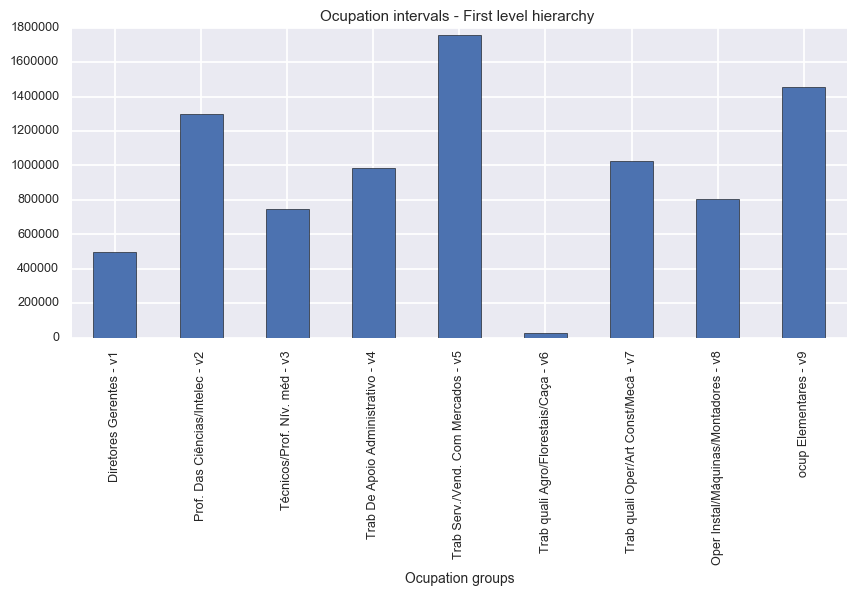

In [9]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.7, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(10, 4), dpi=300)
plt.xlabel('Ocupation groups')
plt.title('Ocupation intervals - First level hierarchy ')
plt.ticklabel_format(style='plain', axis='y')

fig1 = dfocc_group.loc[:,"v1":"v9"].sum().plot(kind='bar')
lab1 = fig1.set_xticklabels(labelsl1)
plt.xlabel('Ocupation groups')

In [10]:
# Labels level 2
labelsl2 = [
'Dir Exe/Adm Púb./Execut Legisla - v11',
'Dirig Administrativos/Comerciais - v12',
'Dirig Geren Produção/Operação - v13',
'Ger Hotéis/Rest/Comércios - v14',
'Prof Ciências/Engenharia - v21',
'Prof Saúde - v22',
'Prof Ensino - v23',
'Esp Org/Adm Pública/Empresa - v24',
'Prof Tec Informação/Comunic - v25',
'Prof Direito/Ciên Socia/Cultura - v26',
'Prof nv méd Ciênc/Engenharia  - v31',
'Prof nv méd Saúde/Afins - v32',
'Prof nv méd Oper Financ/Adm - v33',
'Prof nv méd Jurídico/Soc/Cultura - v34',
'Téc nv méd Tec Informaç/Comun - v35',
'Escriturários - v41',
'Trab Atend Direto ao Público - v42',
'Trab cálc numéric/Encar materia - v43',
'Out Trab Apoio Administrativo - v44',
'Trab Serviços Pessoais - v51',
'Vendedores - v52',
'Trab Cuidados Pessoais - v53',
'Trab Serv Proteção/Segurança - v54',
'Agricultores/Trab Agropecuária  - v61',
'Trab Florestais qual/Pesca/Caça - v62',
'Trab qual/Oper Const/Eletricistas - v71',
'Trab qual/Oper Metal/Const/Mec - v72',
'Artesãos/Oper Artes Gráficas - v73',
'Trab Esp Eletricidade/Eletrônica - v74',
'Oper Proc Aliment/Madeir/Confec - v75',
'Operador Instal Fixas/Máquinas - v81',
'Montadores - v82',
'Condut Veíc/Opera equip pesado - v83',
'Trab Doméstic/Limpeza Edifício - v91',
'Trab Elem Agro/Pesca/Florest - v92',
'Trab elem Miner/Const/Transp - v93',
'Ajudantes Preparação Alimentos - v94',
'Trab Ambulantes Serviços Afins - v95',
'Coletor Lixo/Out ocup Elemen - v96']

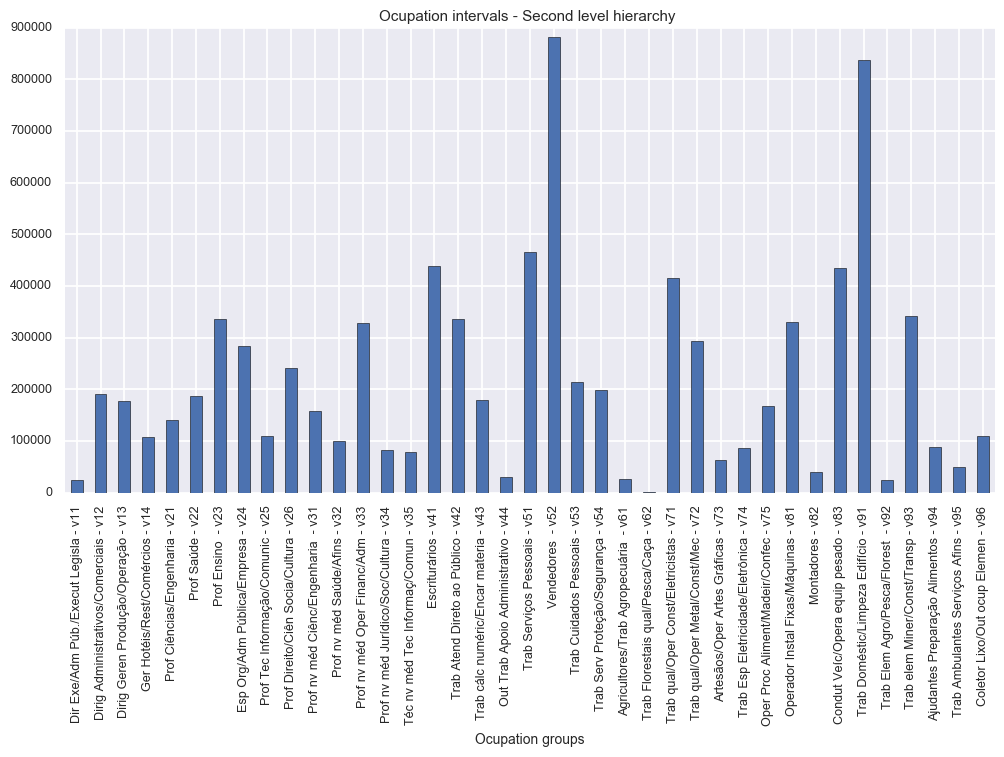

In [11]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.7, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(12, 6), dpi=300)
plt.xlabel('Ocupation groups')
plt.title('Ocupation intervals - Second level hierarchy ')
plt.ticklabel_format(style='plain', axis='y')

fig1 = dfocc_group.loc[:,"v11":"v96"].sum().plot(kind='bar')
plt.xlabel('Ocupation groups')
lab2 = fig1.set_xticklabels(labelsl2)

In [14]:
labelsl3 = [
'Super Poder Exec/Legislativo - v111',
'Diretores Gerais/Ger Gerais - v112',
'Dir Administração/Serviços - v121',
'Dir Venda/Comerc/Desenvolv - v122',
'Dir Prod Agro/Silvicult/Aq/Pesc - v131',
'Dir Ind Transf/Miner/Const/Dist - v132',
'Dirg Serv Tec Inform/Comunic - v133',
'Dirg Ger Serviços Prof - v134',
'Ger Hotéis/Restaurantes - v141',
'Ger Com Atacadista/Varejistas - v142',
'Outros Ger Serviços - v143',
'Físicos/Químicos/Afins - v211',
'Matemátic/Atuário/Estatístico - v212',
'Prof Ciências Biológicas - v213',
'Eng (Exc Eletrotecnólogos) - v214',
'Eng Eletrotécnicos - v215',
'Arquitet/Urban/Agrimens/Desen - v216',
'Médicos - v221',
'Prof Enfermagem/Partos - v222',
'Prof Medicina Tradic/Alternativa - v223',
'Paramédicos - v224',
'Veterinários - v225',
'Outros Prof Saúde - v226',
'Profe Universidades/Ensino Sup - v231',
'Profe Formação Profissional - v232',
'Profe Ensino méd - v233',
'Profe Ensino Fundam/Pré-Escol - v234',
'Outros Prof Ensino - v235',
'Especialistas Finanças - v241',
'Especialistas Organ Administ - v242',
'Prof Vendas/Comerc/Rel Púb - v243',
'Des Analist Prog Software/Multi - v251',
'Espec Base Dados/Rede Comp - v252',
'Prof Direito - v261',
'Arquivolog/Curad Museu/Biblio - v262',
'Esp Ciências Sociais/Teologia - v263',
'Escrit/Jornalistas/Linguistas - v264',
'Artistas Criativos/Interpretativos - v265',
'Téc Ciências Físic/Engenharia - v311',
'Superv Eng Minas/Transf/Const - v312',
'Téc Controle Processos - v313',
'Téc Prof nv méd Ciência Biológ - v314',
'Téc Control Nav Marítima/Aero - v315',
'Téc Médicos Farmacêuticos - v321',
'Prof nv méd Enfermag/Parto  - v322',
'Prof nv méd Medicina Trad/Alte - v323',
'Téc Assistentes Veterinários - v324',
'Outros Prof nv méd Saúde - v325',
'Prof nv méd Finança/Matemát - v331',
'Agentes Corretores Comerciais - v332',
'Agentes Serviços Comerciais - v333',
'Secretários Adm/Especializados - v334',
'Agentes Adm Pública Aplic Lei - v335',
'Prof nv méd Juríd/Socia/Relig - v341',
'Trab Esporte/Condicion Físico - v342',
'Prof nv med Cultur/Artíst/Culiná - v343',
'Téc Oper Tec Info/Comunic/Usr - v351',
'Téc Telecomunic/Radiodifusão  - v352',
'Escriturários Gerais - v411',
'Secretários (Geral) - v412',
'Oper Máquinas Escritório - v413',
'Caixas Banco/Cobrad/Pagador - v421',
'Trab Serv Informação Cliente - v422',
'Auxiliares Contáb/Financeiro - v431',
'Trab Enc Reg Mater/Transport  - v432',
'Outros Trab Apoio Administrat - v441',
'Trab ServDireto Passageiros - v511',
'Cozinheiros - v512',
'Garçons/Atendentes bar  - v513',
'Cabeleir/Trat Beleza Afins - v514',
'Sup Manuten/Limpeza Edifícios - v515',
'Outros Trab Serviços Pessoais - v516',
'Vendedores Rua/Post Mercado - v521',
'Comerciant/Vendedores Lojas - v522',
'Caixas Expedidores Bilhetes - v523',
'Outros Vendedores - v524',
'Cuidad Criança/Ajudantes Prof - v531',
'Trab Cuid Pessoais Serv Saúde - v532',
'Trab Serv Proteção/Segurança - v541',
'Agricult/Trab qual Agricultura - v611',
'Criadores/Trab qual Pecuária  - v612',
'ProdutTrab qual Agropec Mista  - v613',
'Trab Florestais qual/ Afins - v621',
'Pescadores/Caçadores - v622',
'Trab Const Civil Obra Estrutur - v711',
'Trab qual Const (Acabamento) - v712',
'Pintores/Limpad Fachada Afins - v713',
'Moldador/Sold/Chapist/Caldeir - v721',
'Ferreiros/Ferramenteiros Afins - v722',
'Mecânic/Reparad Máquinas - v723',
'Artesãos - v731',
'Trab qual/Oper Artes Gráficas - v732',
'Instal/Reparador Equip Elétrico - v741',
'Instal/Rep Equip Eletrô/Teleco - v742',
'Trab qual Proces Alimentos - v751',
'Trab qual Madeira/Marceneiros - v752',
'Trab ql Op Confec/Calçad/Aces - v753',
'Out Trab ql/Op Indúst/Artesan - v754',
'Oper Minera/Extr Proc Minerais - v811',
'Oper Proc Recobridoras Metais - v812',
'Oper Inst Máq Químic/Fotográf - v813',
'Op Máq Borrach/Papel/Plástico - v814',
'Oper Máq Têxteis/Art Couro - v815',
'Oper Máq Aliment/Prod Afins - v816',
'Op Inst Papel/Proc Madeira - v817',
'Out Op Instal Fixa/Máquinas - v818',
'Montadores - v821',
'Maquinist Locomotivas Afins - v831',
'Condut Automóv/Caminho/Moto - v832',
'Condut Cam Pesados/Ônibus - v833',
'Oper Equip Móveis Pesados - v834',
'Marinheiros Coberta E Afins - v835',
'Trab Domést/Limpeza Edifícios - v911',
'Lavador Veíc/Janel/Roupa/Limp - v912',
'Trab elem Agrop/Pesc/Florest  - v921',
'Trab elem Mineraç/Construção - v931',
'Trab elem Ind Transformação - v932',
'Trab elem Transpor/Armazen - v933',
'Ajudantes Preparação Aliment - v941',
'Trab Ambulant Serviços Afins - v951',
'Vend Ambulant (Exc Aliment) - v952',
'Coletores Lixo - v961',
'Outras Ocupações elem - v962']

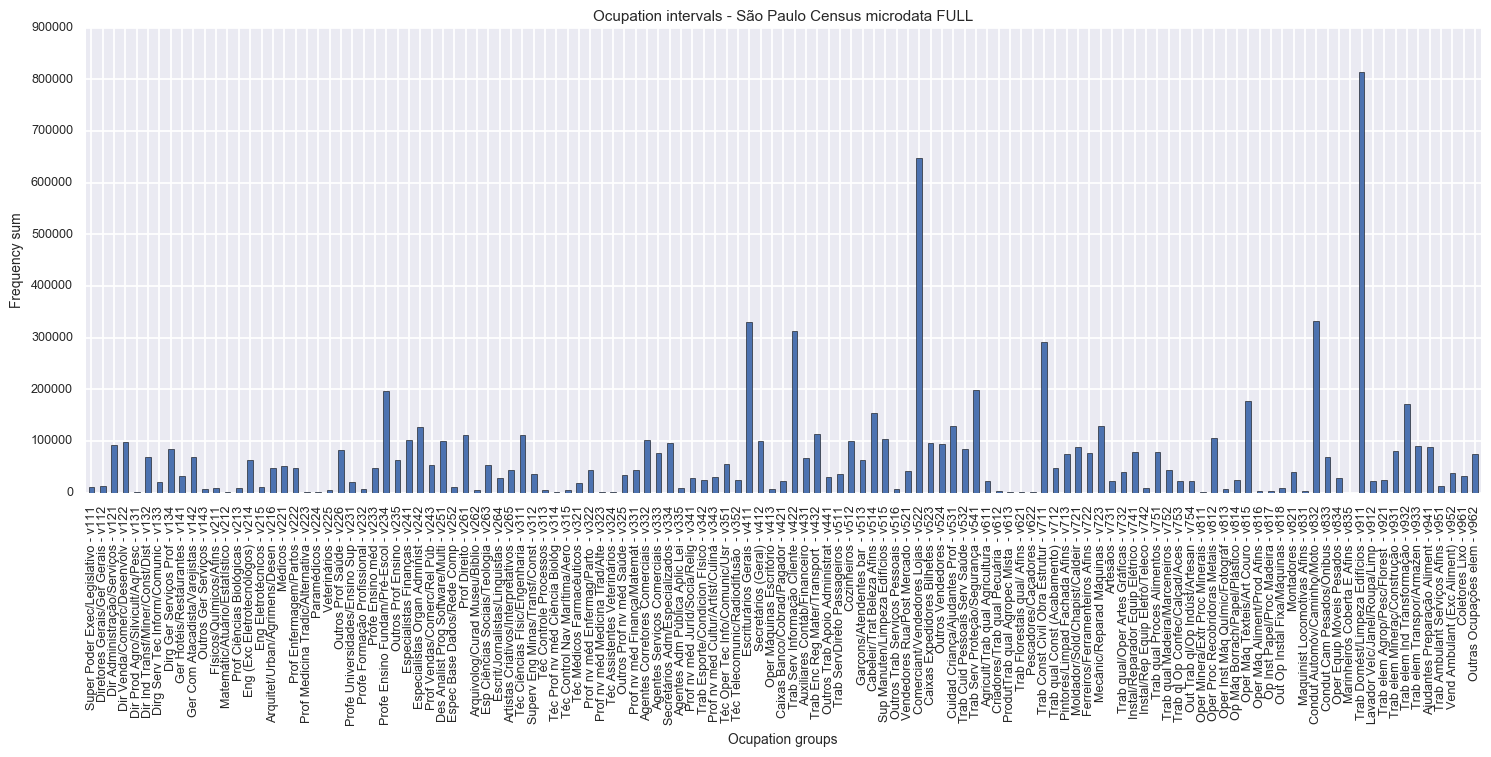

In [15]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.7, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(18, 6), dpi=300)
plt.ylabel('Frequency sum')
plt.title('Ocupation intervals - São Paulo Census microdata FULL')
plt.ticklabel_format(style='plain', axis='y')

fig2 = dfocc_group.loc[:,"v111":"v962"].sum().plot(kind='bar')
plt.xlabel('Ocupation groups')
lab3 = fig2.set_xticklabels(labelsl3)

## Pearson Correlations

In [16]:
# Slice data frame to get proportion data columns
cor_occup_hier1 = dfocc_group.loc[:,'v1':'v9'].corr()
cor_occup_hier1

v1        v2        v3        v4        v5        v6        v7  \
v1  1.000000  0.928289  0.709880  0.267337  0.060846 -0.095253 -0.289038   
v2  0.928289  1.000000  0.733399  0.267526  0.066267 -0.105128 -0.308287   
v3  0.709880  0.733399  1.000000  0.752816  0.524918 -0.158945  0.138803   
v4  0.267337  0.267526  0.752816  1.000000  0.785622 -0.127824  0.530512   
v5  0.060846  0.066267  0.524918  0.785622  1.000000 -0.023108  0.730724   
v6 -0.095253 -0.105128 -0.158945 -0.127824 -0.023108  1.000000  0.095952   
v7 -0.289038 -0.308287  0.138803  0.530512  0.730724  0.095952  1.000000   
v8 -0.197872 -0.216068  0.269647  0.661611  0.750341  0.010381  0.848002   
v9 -0.254197 -0.285956  0.073488  0.446542  0.734072  0.175937  0.879039   

          v8        v9  
v1 -0.197872 -0.254197  
v2 -0.216068 -0.285956  
v3  0.269647  0.073488  
v4  0.661611  0.446542  
v5  0.750341  0.734072  
v6  0.010381  0.175937  
v7  0.848002  0.879039  
v8  1.000000  0.748012  
v9  0.748012  1.000000

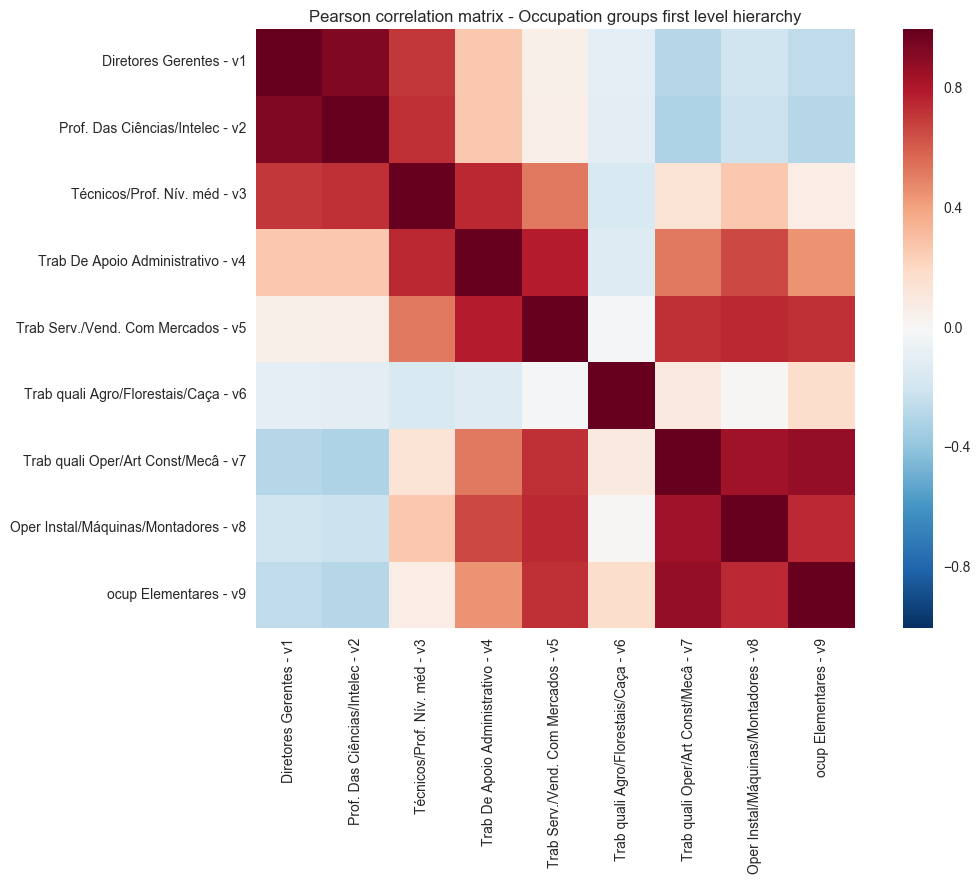

In [17]:
# Plot Heatmap based on hier_level1 data frame 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(12, 9), dpi=300)
plt.title('Pearson correlation matrix - Occupation groups first level hierarchy')
f2 = sns.heatmap(cor_occup_hier1, square=True, xticklabels=labelsl1, yticklabels=labelsl1)
plt.tight_layout()

# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_pearson_.png")

In [18]:
# Slice data frame to get proportion data columns
cor_occup_hier2 = dfocc_group.loc[:,'v11':'v96'].corr()
cor_occup_hier2.head()

v11       v12       v13       v14       v21       v22       v23  \
v11  1.000000  0.677312  0.688318  0.486252  0.708815  0.655080  0.451422   
v12  0.677312  1.000000  0.875933  0.686108  0.841533  0.785891  0.706971   
v13  0.688318  0.875933  1.000000  0.737071  0.864630  0.828723  0.707835   
v14  0.486252  0.686108  0.737071  1.000000  0.668225  0.662033  0.690013   
v21  0.708815  0.841533  0.864630  0.668225  1.000000  0.898704  0.684795   

          v24       v25       v26    ...          v75       v81       v82  \
v11  0.601687  0.455376  0.755509    ...    -0.219301 -0.261006 -0.203259   
v12  0.879850  0.761829  0.816510    ...    -0.133757 -0.226015 -0.168157   
v13  0.830280  0.755031  0.866245    ...    -0.196749 -0.253375 -0.204974   
v14  0.678201  0.582400  0.663235    ...     0.055422 -0.035130 -0.057189   
v21  0.851946  0.739292  0.897087    ...    -0.236597 -0.308126 -0.246366   

          v83       v91       v92       v93       v94       v95       v96  
v11 -0.221853 -0.135051 -0.058639 -0.264896 -0.211227 -0.109368 -0.214116  
v12 -0.109013 -0.175915 -0.139982 -0.282232 -0.203983  0.013429 -0.187727  
v13 -0.171848 -0.240063 -0.113541 -0.338493 -0.216275 -0.022775 -0.189298  
v14  0.035147 -0.128583 -0.045285 -0.133637 -0.035147  0.142235  0.057286  
v21 -0.272037 -0.268099 -0.106264 -0.370084 -0.255220 -0.043435 -0.255495  

[5 rows x 39 columns]

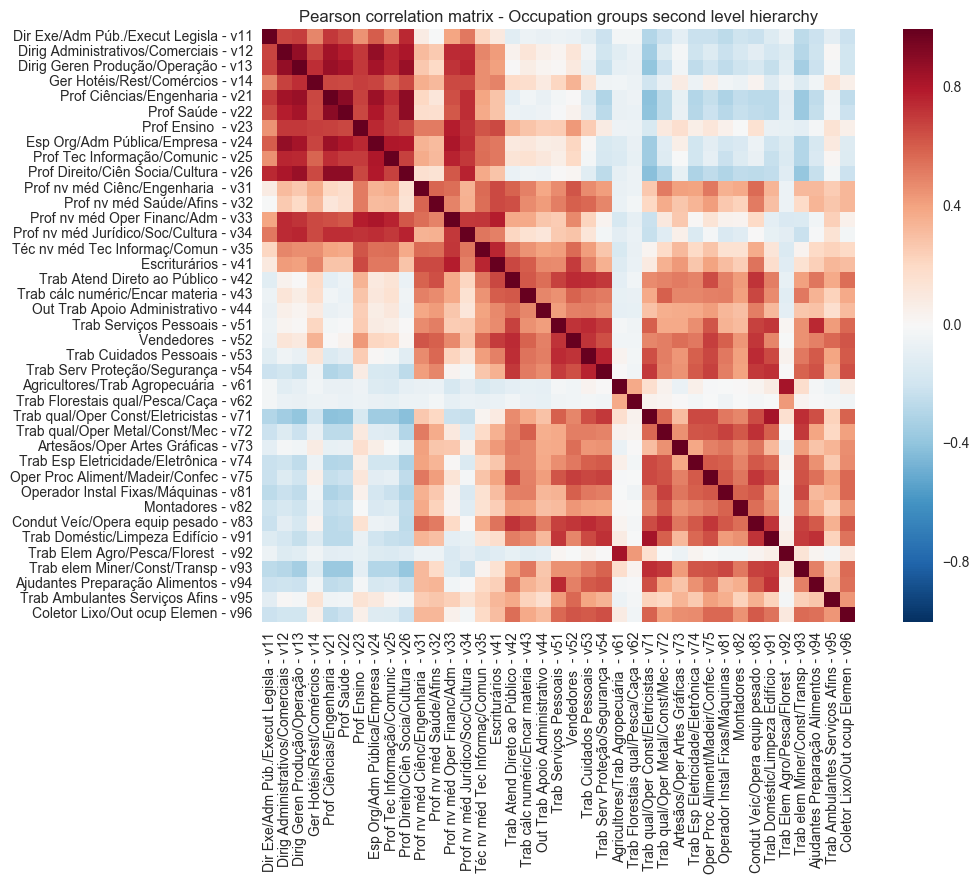

In [19]:
# Plot Heatmap based on hier_level3 data frame 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(12, 9), dpi=300)
plt.title('Pearson correlation matrix - Occupation groups second level hierarchy')
f2 = sns.heatmap(cor_occup_hier2, square=True, xticklabels=labelsl2, yticklabels=labelsl2)
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_pearson_hierl2.png")

In [21]:
# Slice data frame to get proportion data columns
cor_occup_hier3 = dfocc_group.loc[:,'v111':'v962'].corr()
cor_occup_hier3.head()

v111      v112      v121      v122      v131      v132      v133  \
v111  1.000000  0.435541  0.467469  0.459892  0.175977  0.412085  0.435268   
v112  0.435541  1.000000  0.580927  0.645249  0.397439  0.488921  0.531825   
v121  0.467469  0.580927  1.000000  0.852122  0.227652  0.724370  0.721610   
v122  0.459892  0.645249  0.852122  1.000000  0.277184  0.747991  0.745983   
v131  0.175977  0.397439  0.227652  0.277184  1.000000  0.207883  0.245337   

          v134      v141      v142    ...         v912      v921      v931  \
v111  0.535763  0.261144  0.324276    ...    -0.070142 -0.025066 -0.175069   
v112  0.619758  0.228471  0.399989    ...    -0.130804 -0.064248 -0.186371   
v121  0.767812  0.470183  0.599515    ...    -0.126592 -0.125151 -0.249785   
v122  0.814520  0.427946  0.600024    ...    -0.141542 -0.143230 -0.302886   
v131  0.323172  0.167386  0.251139    ...    -0.087000  0.192603 -0.043373   

          v932      v933      v941      v951      v952      v961      v962  
v111 -0.151649 -0.116053 -0.159717 -0.084294 -0.049186 -0.137655 -0.108388  
v112 -0.238748 -0.190422 -0.194149 -0.127617 -0.082377 -0.182205 -0.173841  
v121 -0.208013 -0.092067 -0.182975 -0.028687  0.067666 -0.192256 -0.077425  
v122 -0.302626 -0.163353 -0.208179 -0.081216 -0.001366 -0.240633 -0.146444  
v131 -0.066959 -0.105459 -0.134571 -0.063076 -0.027753 -0.125159 -0.024947  

[5 rows x 123 columns]

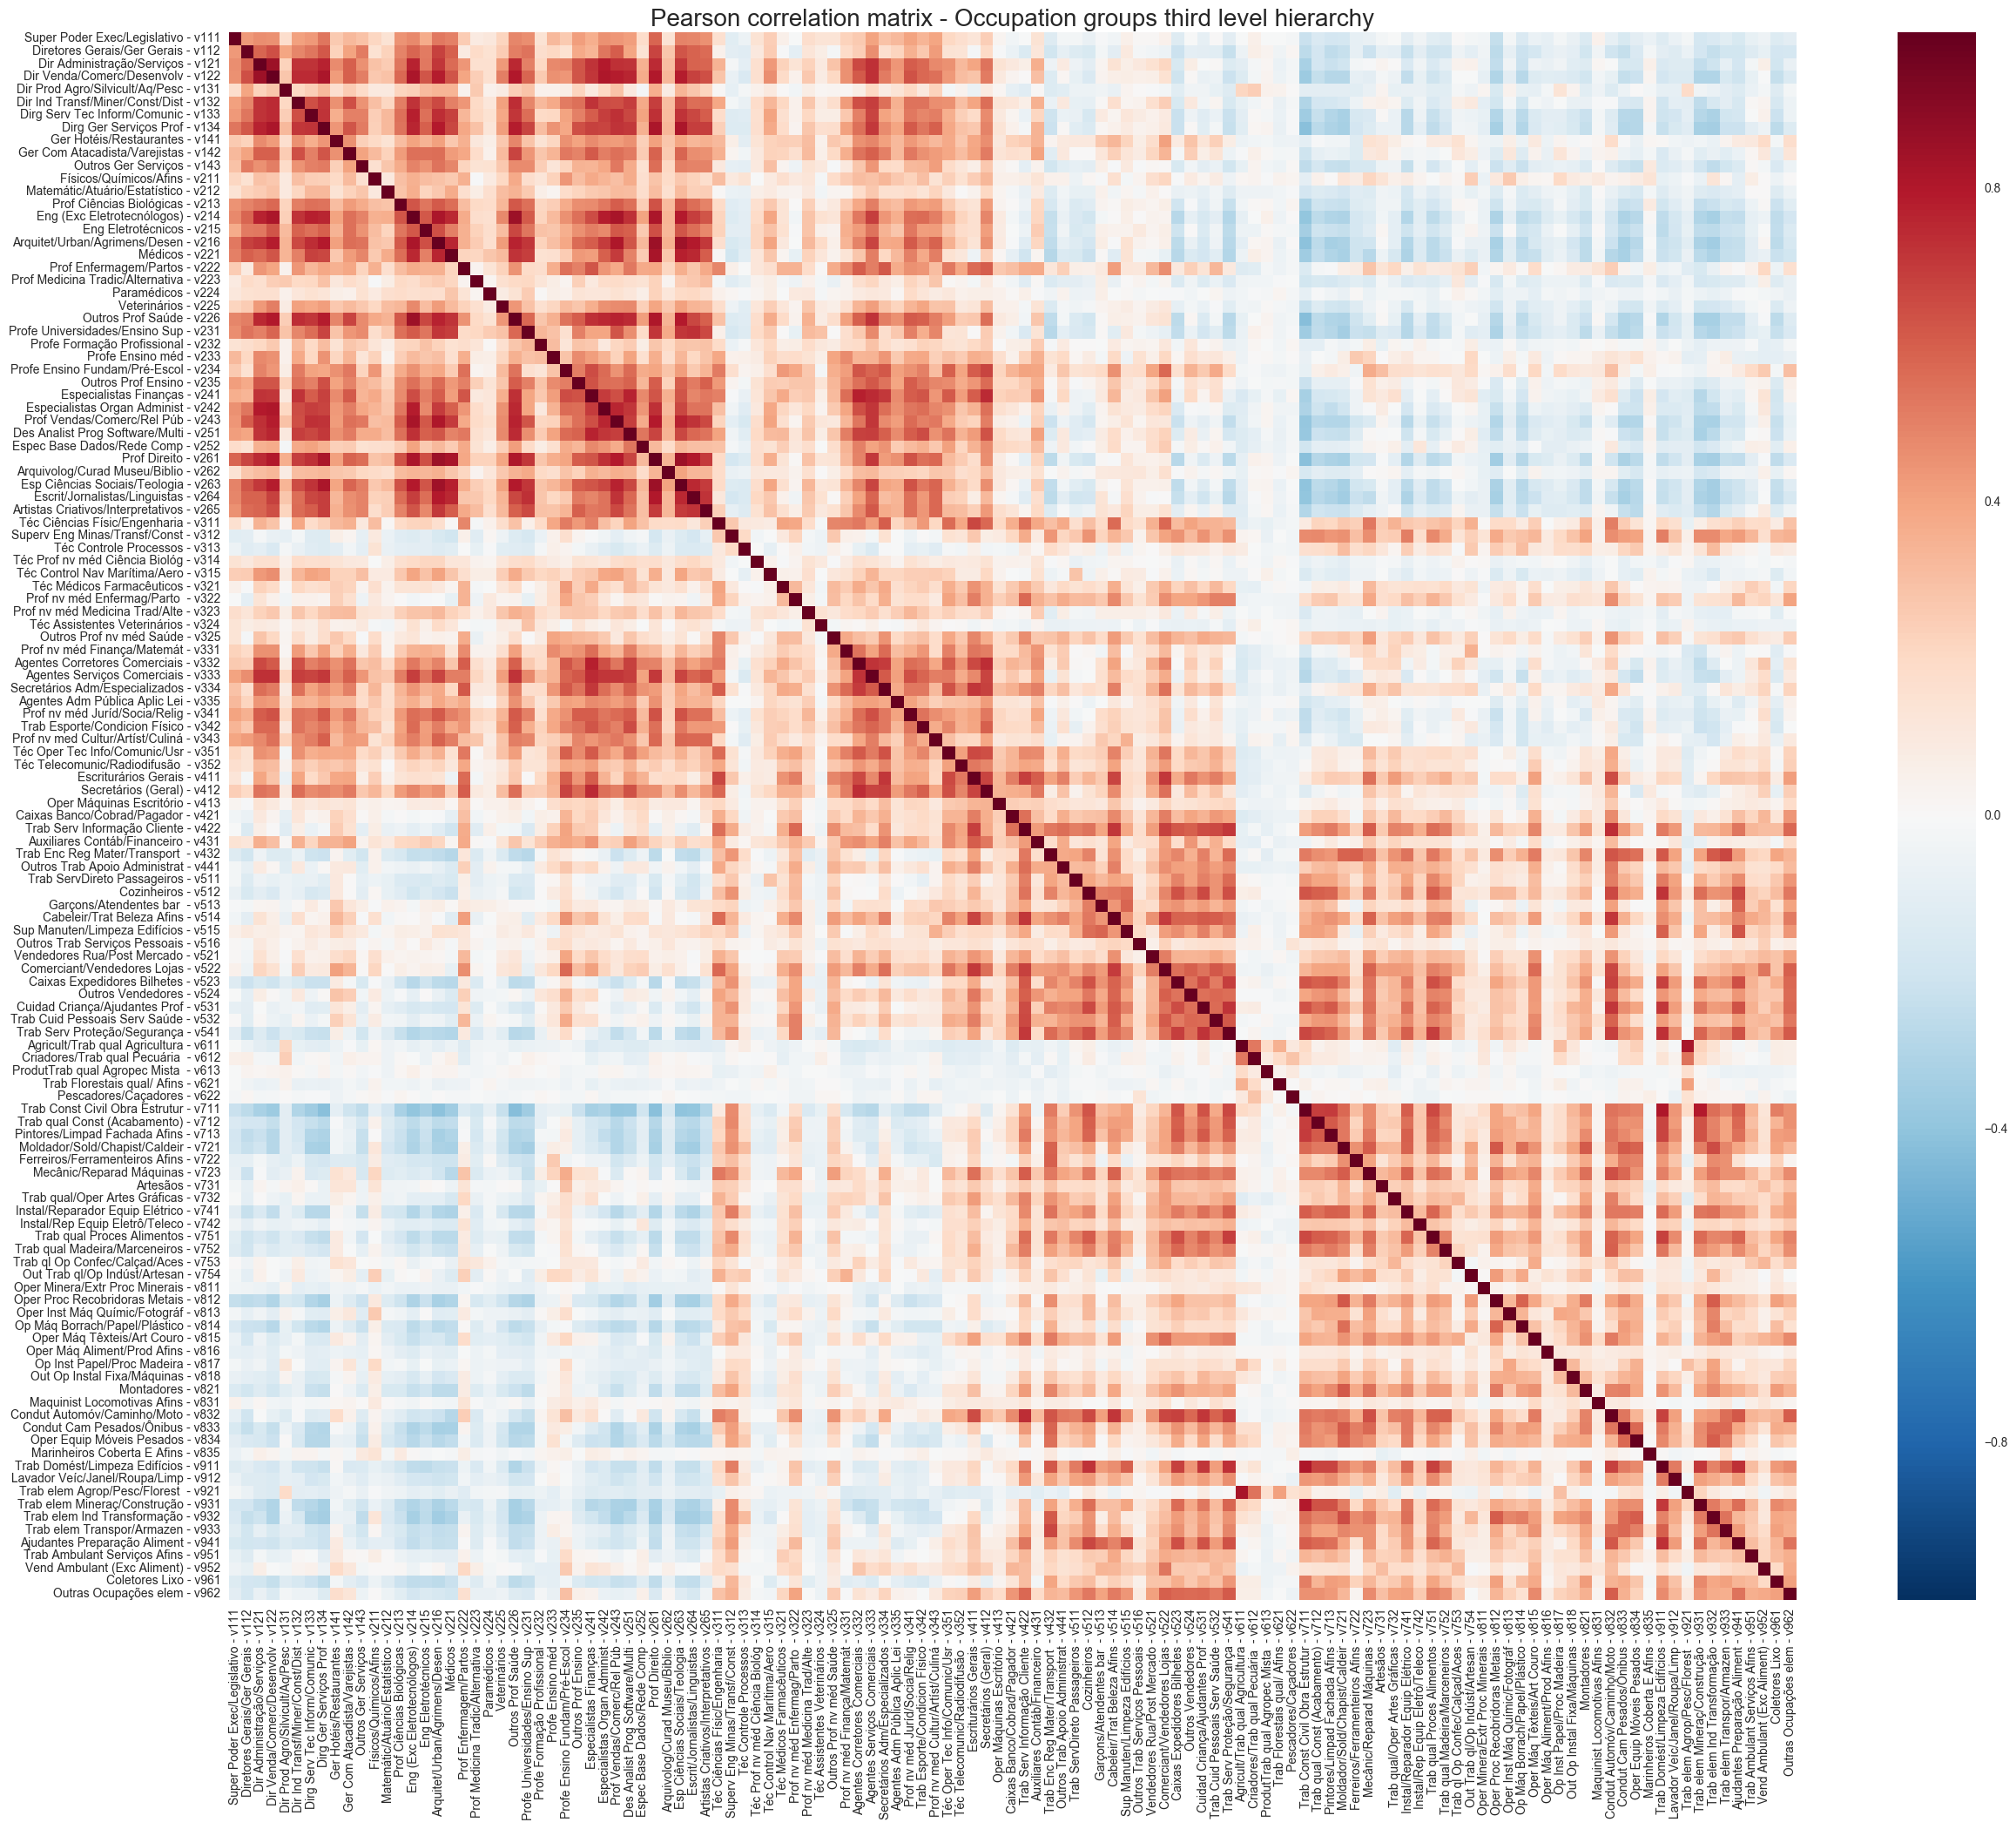

In [22]:
# Plot Heatmap based on hier_level3 data frame 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(26, 21), dpi=300)
plt.title('Pearson correlation matrix - Occupation groups third level hierarchy', fontsize=20)
f3 = sns.heatmap(cor_occup_hier3, square=True, xticklabels=labelsl3, yticklabels=labelsl3)
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_pearson_hierl3.png")

## Moran I Correlations

In [23]:
# Read dbf associated with the same shape file
# Obs: QGIS field lenght limit(10) changed column names during join

def calc_moran(arrayi, arrayj, weight):
    moran = pysal.Moran_BV(arrayi, arrayj, weight, permutations=999)
    result = moran.I
    pvalue = moran.p_z_sim
    return result, pvalue


def block_processing(i, weight, varnames, file):
    morans = []
    pvalues = []
    
    for item in varnames:
        j = np.array(file.by_col[item])
        serie = calc_moran(i,j,weight)
        moran = serie[0]
        pvalue = serie[1]
        morans.append(moran)
        pvalues.append(pvalue)
    return morans, pvalues


def calc_moran_matrix(varnames, weight, file):
    moran_matrix = []
    pvalue_matrix = []
    
    for item in varnames:
        i = np.array(file.by_col[item])
        result = block_processing(i,weight, varnames, file)
        res_moran = result[0]
        res_pvalue = result[1]
        moran_matrix.append(res_moran)
        pvalue_matrix.append(res_pvalue)
    return moran_matrix, pvalue_matrix

In [27]:
# Save data with new columns to csv
csvoccup = "~/Dropbox/Resolution - SP London/Data/Census/São Paulo/occupation_grouped_rmsp_2010.csv"
dfocc_group.loc[:,'v111':'v9'].to_csv(csvoccup)  #save to csv

**Based on Queen Contiguity Weight**

Prepares data reading shape file for OA London and computes Contiguity Based Weights using Queen method

In [28]:
shp_path1 = "/Users/sandrofsousa/Dropbox/Resolution - SP London/Data/Shape files/" \
            "São Paulo/WeightingAreas_Shapefile/AP2010_CEM_RMSP_EGP_EDU_OCC.shp"
weight_cont_occup = pysal.queen_from_shapefile(shp_path1)

**Histogram showing the distribuition of neighbors in queen weight**

<Container object of 14 artists>

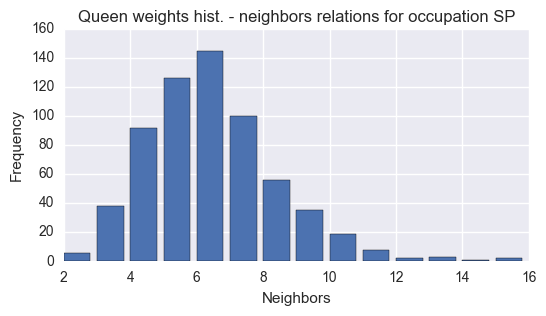

In [32]:
% matplotlib inline
sns.set(context="notebook")
plt.figure(facecolor="white", figsize=(6, 3), dpi=300)
plt.xlabel('Neighbors')
plt.ylabel('Frequency')
plt.title('Queen weights hist. - neighbors relations for occupation SP')
plt.bar(*zip(*weight_cont_occup.histogram))

**Compute Bivariate Moran for all elements of occupation groups**

Variables are compared pairwised resulting on a matrix 999 random permutations are used for calculation of pseudo p_values

In [33]:
# Call main function to compute Moran and P-values ethnic groups
    
f1 = pysal.open("/Users/sandrofsousa/Dropbox/Resolution - SP London/Data/Shape files/" \
            "São Paulo/WeightingAreas_Shapefile/AP2010_CEM_RMSP_EGP_EDU_OCC_CENT.dbf")

In [34]:
var_occup_hier1 = list(cor_occup_hier1)
matrices_occupl1 = calc_moran_matrix(var_occup_hier1, weight_cont_occup, f1)

In [35]:
dfmoran_occup_hier1 = pd.DataFrame(matrices_occupl1[0], columns=var_occup_hier1, index=var_occup_hier1)
dfmoran_occup_hier1.head()

v1        v2        v3        v4        v5        v6        v7  \
v1  0.658982  0.662151  0.469358  0.137440 -0.013946 -0.161879 -0.310532   
v2  0.654885  0.695549  0.475271  0.130707 -0.008251 -0.167018 -0.331100   
v3  0.474043  0.488860  0.567814  0.416968  0.242053 -0.240197 -0.058301   
v4  0.145112  0.141683  0.425650  0.530412  0.397935 -0.218650  0.213753   
v5 -0.002255 -0.000777  0.248634  0.399700  0.448403 -0.145568  0.279384   

          v8        v9  
v1 -0.216893 -0.243257  
v2 -0.233715 -0.262907  
v3  0.084393 -0.057416  
v4  0.341231  0.180205  
v5  0.350712  0.289927

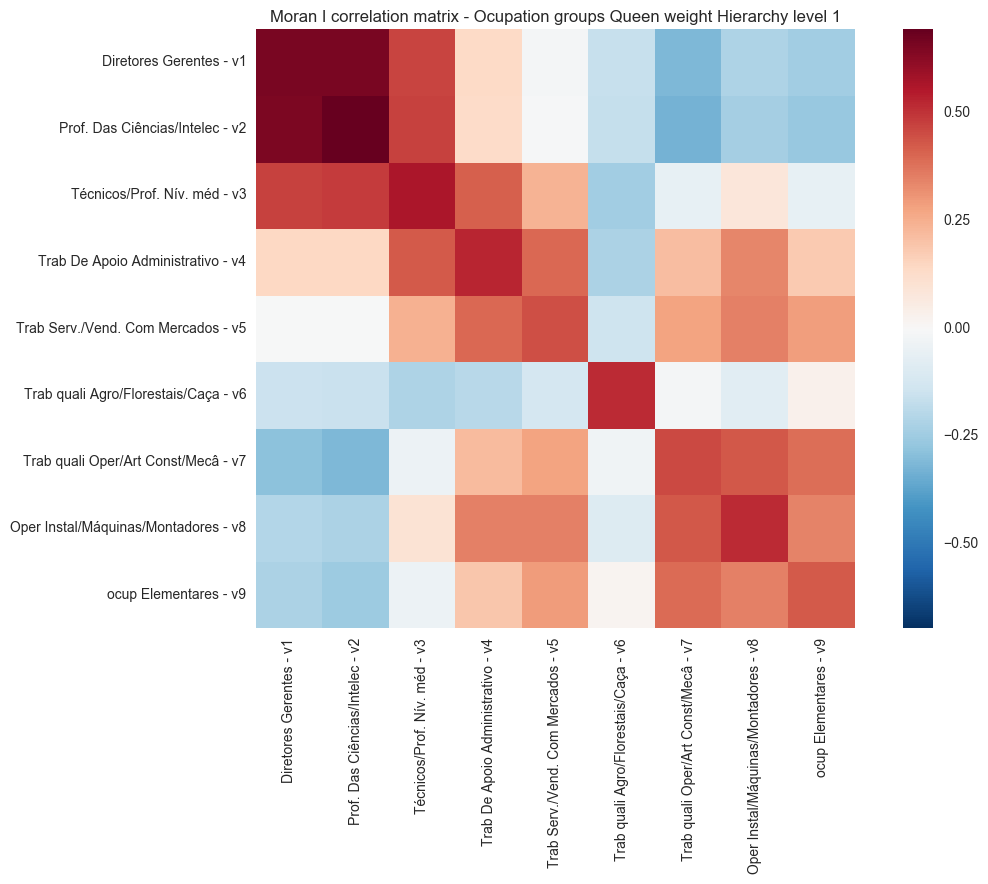

In [36]:
# Plot Heatmap based on dfmoran_occup data frame - Proportions 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(12,9), dpi=300)
plt.title('Moran I correlation matrix - Ocupation groups Queen weight Hierarchy level 1')
h1 = sns.heatmap(dfmoran_occup_hier1, square=True, xticklabels=labelsl1, yticklabels=labelsl1)
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_moran_hierl1.png")

**Moran Bivariate Queen weight for second hierarchy level**

In [37]:
var_occup_hier2 = list(cor_occup_hier2)
matrices_occupl2 = calc_moran_matrix(var_occup_hier2, weight_cont_occup, f1)

In [38]:
dfmoran_occup_hier2 = pd.DataFrame(matrices_occupl2[0], columns=var_occup_hier2, index=var_occup_hier2)
dfmoran_occup_hier2.head()

v11       v12       v13       v14       v21       v22       v23  \
v11  0.396942  0.449160  0.480618  0.317016  0.495120  0.462388  0.288261   
v12  0.452295  0.616879  0.621938  0.445508  0.604404  0.558923  0.435836   
v13  0.475960  0.612061  0.667638  0.483738  0.643622  0.599016  0.463147   
v14  0.319221  0.453091  0.499478  0.442908  0.489230  0.473969  0.396988   
v21  0.497776  0.595401  0.645584  0.474014  0.680640  0.645559  0.433550   

          v24       v25       v26    ...          v75       v81       v82  \
v11  0.429131  0.368303  0.534710    ...    -0.219276 -0.244663 -0.194843   
v12  0.600898  0.540556  0.612028    ...    -0.164854 -0.215748 -0.161969   
v13  0.607815  0.563025  0.662165    ...    -0.203113 -0.248268 -0.201500   
v14  0.481812  0.428333  0.501341    ...    -0.070386 -0.122366 -0.114232   
v21  0.604365  0.547930  0.689732    ...    -0.238484 -0.287253 -0.217272   

          v83       v91       v92       v93       v94       v95       v96  
v11 -0.208887 -0.151966 -0.067005 -0.244311 -0.156861 -0.021651 -0.177990  
v12 -0.117484 -0.151740 -0.143741 -0.257851 -0.143756  0.019334 -0.141841  
v13 -0.174065 -0.213855 -0.126061 -0.316707 -0.177916  0.009617 -0.155346  
v14 -0.087775 -0.177335 -0.095264 -0.245986 -0.086580  0.122879 -0.025289  
v21 -0.250907 -0.231370 -0.113632 -0.337484 -0.189760 -0.018174 -0.203279  

[5 rows x 39 columns]

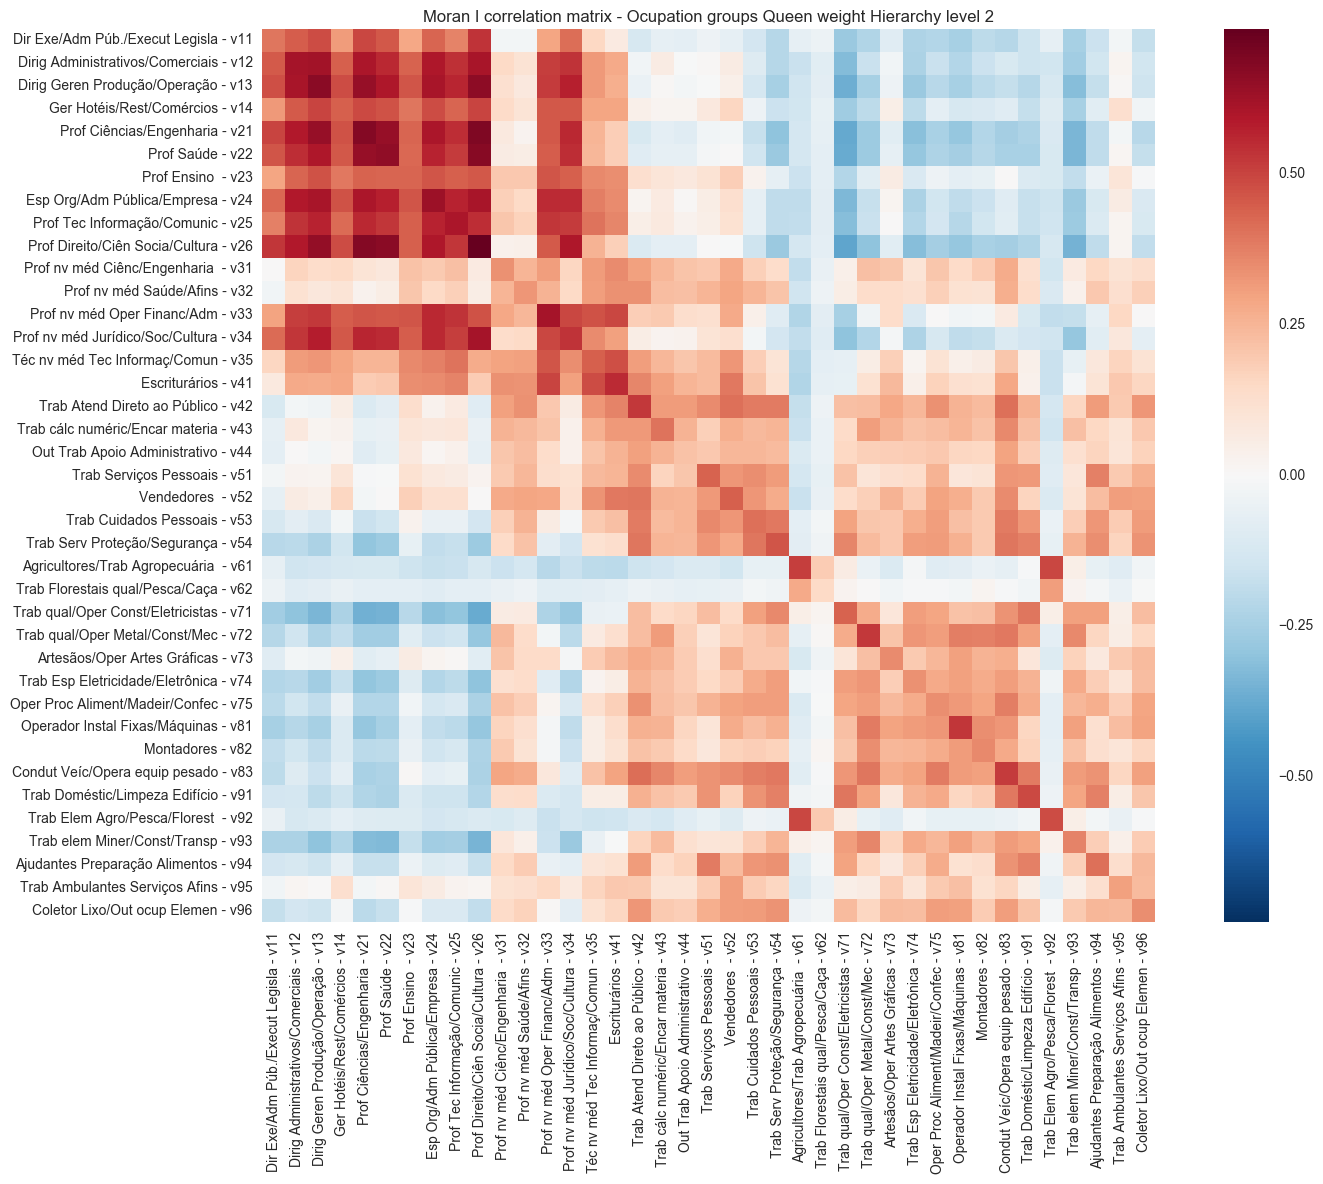

In [39]:
# Plot Heatmap based on dfmoran_occup data frame - Proportions 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(16,12), dpi=300)
plt.title('Moran I correlation matrix - Ocupation groups Queen weight Hierarchy level 2')
h2 = sns.heatmap(dfmoran_occup_hier2, square=True, xticklabels=labelsl2, yticklabels=labelsl2)
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_moran_hierl2.png")

**Moran Bivariate Queen weight for third hierarchy level**

In [40]:
var_occup_hier3 = list(cor_occup_hier3)
matrices_occupl3 = calc_moran_matrix(var_occup_hier3, weight_cont_occup, f1)

In [41]:
dfmoran_occup_hier3 = pd.DataFrame(matrices_occupl3[0], columns=var_occup_hier3, index=var_occup_hier3)
dfmoran_occup_hier3.head()

v111      v112      v121      v122      v131      v132      v133  \
v111  0.227133  0.229102  0.257915  0.299434  0.105233  0.238211  0.269179   
v112  0.218129  0.391424  0.386281  0.454789  0.177726  0.348598  0.421924   
v121  0.260022  0.388296  0.523291  0.563208  0.125464  0.486652  0.475854   
v122  0.302091  0.458117  0.561819  0.625220  0.155688  0.530036  0.536515   
v131  0.094101  0.208655  0.144399  0.184999  0.143941  0.136748  0.193994   

          v134      v141      v142    ...         v912      v921      v931  \
v111  0.342132  0.180842  0.206314    ...    -0.116870 -0.053130 -0.188112   
v112  0.458329  0.178314  0.255942    ...    -0.119796 -0.060264 -0.183358   
v121  0.542266  0.304074  0.352004    ...    -0.119831 -0.135051 -0.257189   
v122  0.608786  0.321766  0.387983    ...    -0.115569 -0.141268 -0.264196   
v131  0.211418  0.056380  0.119548    ...    -0.111219  0.124579 -0.091976   

          v932      v933      v941      v951      v952      v961      v962  
v111 -0.179611 -0.093838 -0.153572 -0.078879  0.021589 -0.111760 -0.117727  
v112 -0.222754 -0.123668 -0.125403 -0.055596 -0.014167 -0.143368 -0.135550  
v121 -0.235609 -0.055971 -0.143812 -0.034779  0.049390 -0.128009 -0.077500  
v122 -0.277206 -0.097671 -0.133517 -0.055981  0.020828 -0.175562 -0.107079  
v131 -0.136294 -0.118360 -0.124301 -0.027723 -0.066854 -0.089089 -0.095241  

[5 rows x 123 columns]

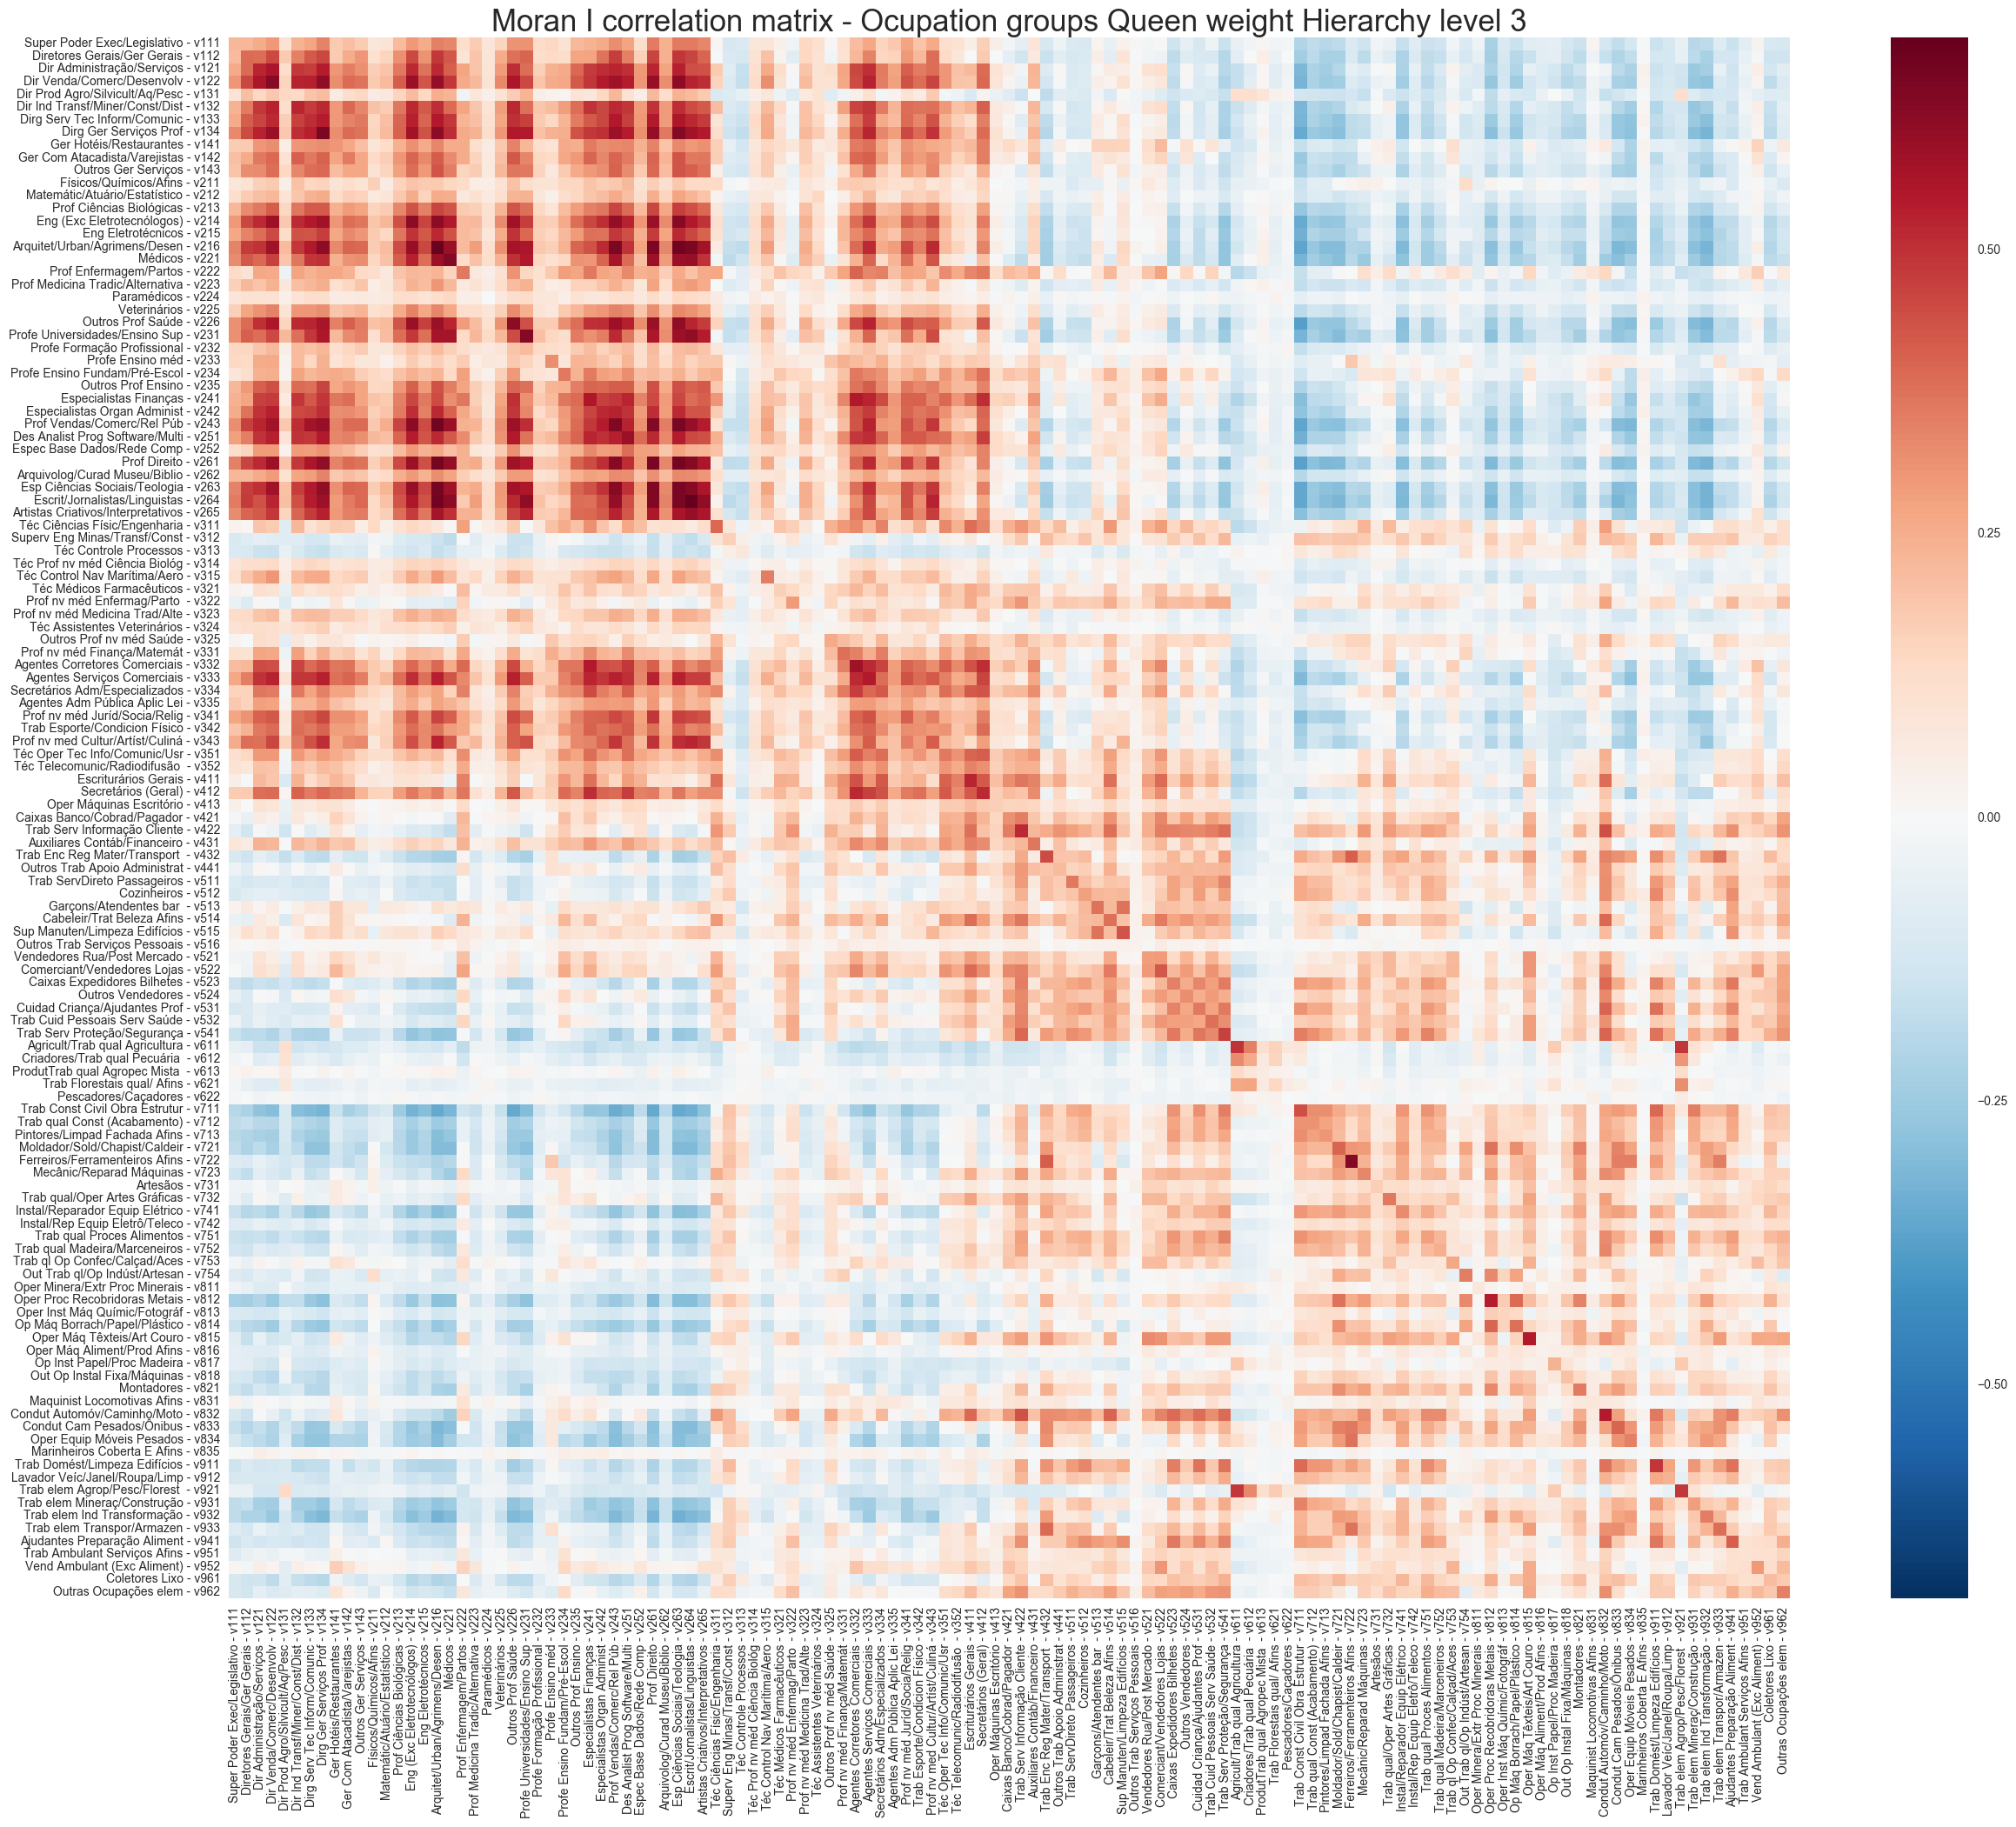

In [42]:
# Plot Heatmap based on dfmoran_occup data frame - Proportions 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(26, 21), dpi=300)
plt.title('Moran I correlation matrix - Ocupation groups Queen weight Hierarchy level 3', fontsize=25)
h3 = sns.heatmap(dfmoran_occup_hier3, square=True, xticklabels=labelsl3, yticklabels=labelsl3)
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_moran_hierl3.png")